# Laboratorio 1: Acceso a datos mediante pandas

En esta práctica accederemos a la Wikipedia para recabar los datos de población de un conjunto de países y realizaremos algunas representaciones gráficas.

En la página web enlazada en el campus virtual, y de título "Países por población: pasado, presente y futuro" se muestra la evolución de un buen número de países y territorios del mundo entre 1950 y 2050, organizada en un conjunto de tablas. En esta práctica combinaremos los datos de todos los países-territorios y todos los años en una sola trama de datos de panda, y visualizaremos los cambios en la población de los distintos países-territorios.

### Utilizaremos en esta práctica las siguientes librerías: 
[pandas](http://pandas.pydata.org/) proporciona estructuras de datos fáciles de usar y funciones de acceso a datos desde múltiples fuentes y formatos.  
[matplotlib](matplotlib.org) permite generar múltiples tipos de gráficos.  
 

### Realizaremos esta práctica en los siguientes pasos:

* Reunir los datos en una trama de datos panda
* Visualizar los datos

A continuación indicamos algunas operaciones iniciales para incorporar al proyecto algunas librerías útiles

In [1]:
# Una configuración de visualización
#import visual_style
#visual_style.customize_mpl()
#visual_style.customize_css()

# comando IPython para preparar el cuaderno para matplotlib
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt


## Extraer las tablas a partir de un documento html de la Wikipedia
Utilizaremos el método read_html() de la librería pandas para leer las tablas que hay en el fichero html

In [2]:
# Ojo, en este documento html el separador de miles es un punto
# Utilizamos la etiqueta 'País o territorio' para filtrar las tablas de interés
# Imprimimos el número de tablas que hemos leído mediante la función len(). Deberían ser 3.

#NOTA: Por seguridad me he descargado la web y he trabajado con ella en local, pero de igual forma se puede
#poner la url a la web si se dispone de conexión a internet y la web está disponible
#url=https://web-beta.archive.org/web/20150920073507/https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_por_poblaci%C3%B3n_pasada,_actual_y_futura
tablas = pd.read_html(io = "Anexo:Países por población pasada, actual y futura - Wikipedia, la enciclopedia libre.html",
                 match = u'País o territorio', thousands = '.', index_col=1, header=0)
#print(tablas)
print("El número de tablas leído es " + str(len(tablas)))


El número de tablas leído es 3


## Construimos una sola tabla con la información de población
Reunimos las tablas con los diferentes periodos en una sola tabla, mediante los métodos de pandas join(), merge(), o concat(), extraemos la cabecera y seleccionamos las columnas que corresponden solamente a fechas. Podemos utilizar el método head() para inspeccionar las primeras filas de la tabla y que la salida sea más manejable.

In [3]:
# Reunimos las tres tablas en una sola.
# Imprimimos las primeras filas a modo de comprobación, mediante head()
# Generamos una lista con la información almacenada en las columnas mediante list()
# Seleccionamos de la cabecera las columnas correspondientes a las fechas mediante isnumeric() 
# Puede ser útil el utilizar la noción de 'list comprehension' por sencillez
# Leemos la tabla por fechas y la almacenamos para su uso. Imprimimos para verificar que es correcto


In [4]:
tabla = pd.concat(tablas, axis=1)
print(tabla.head())
lista = list(tabla)
#print(lista)
indices = []
indice = 0;
for elemento in lista:
    if elemento.isnumeric():
        #print('Sí')
        indices.append(indice)
    #else:
        #print('No')
    indice = indice + 1;
#print(indices)
tabla = tabla[indices]
print(tabla.head())

                   #   1950   1955     %   1960   %.1   1965    %.2   1970  \
País o territorio                                                            
Afganistán         1   8150   8891  1,76   9829  2,03  10998   2,27  12431   
Albania            2   1227   1392  2,56   1623  3,12   1884   3,03   2157   
Alemania           3  68375  70196  0,53  72481  0,64  75639   0,86  77783   
Andorra            4      6      6  0,00      8  5,92     14  11,84     20   
Angola             5   4118   4423  1,44   4797  1,64   5135   1,37   5606   

                    %.3  ...     2030    %.2   2035    %.3   2040    %.4  \
País o territorio        ...                                               
Afganistán         2,48  ...    45665   2,12  50195   1,91  54717   1,74   
Albania            2,74  ...     3103  -0,01   3062  -0,27   2994  -0,45   
Alemania           0,56  ...    78022  -0,31  76589  -0,37  74984  -0,42   
Andorra            7,39  ...       84  -0,24     83  -0,24     81  -0,49 

## Algunas funciones de acceso a datos para una trama de pandas
Jugaremos con las posibilidades de pandas para manejar tablas mediante un conjunto sencillo de ejercicios.

### Ejercicio 1
Imprimir la tabla correspondiente a las poblaciones de Alemania, Andorra y Angola desde 2015 a 2025.

In [5]:
# Creamos una subtabla a partir de una indexación mediante el uso de la opción .loc



In [6]:
print("subtabla")
subtabla1 = tabla.loc[['Alemania','Andorra','Angola'],'2015':'2025']
print(subtabla1)

subtabla
                    2015   2020   2025
País o territorio                     
Alemania           80854  80160  79226
Andorra               86     86     85
Angola             19625  22484  25673


### Ejercicio 2
Imprimir la subtabla que va desde las filas 3 a 8 y desde las columnas 5 a 9.

In [7]:
# Creamos una subtabla a partir de una indexación mediante el uso de la opción .iloc



In [8]:
print("subtabla")
subtabla2 = tabla.iloc[2:8,4:9]
print(subtabla2)

subtabla
                    1970   1975   1980   1985   1990
País o territorio                                   
Alemania           77783  78682  78298  77685  79380
Andorra               20     27     34     45     53
Angola              5606   6050   7206   8390   9485
Anguila (RU)           6      6      7      7      8
Antigua y Barbuda     66     68     69     64     64
Arabia Saudita      6109   7208  10022  13330  16061


### Ejercicio 3
Imprimir la columna correspondiente al año 1955.

In [9]:
# Creamos una columna mediante selección por el título de la columna



In [10]:
print("Población de 1955")
columna = tabla.loc[:,'1955']
print(columna)

Población de 1955
País o territorio
Afganistán                    8891
Albania                       1392
Alemania                     70196
Andorra                          6
Angola                        4423
Anguila (RU)                     5
Antigua y Barbuda               51
Arabia Saudita                4243
Argelia                       9842
Argentina                    18928
Armenia                       1565
Aruba (PB)                      54
Australia                     9277
Austria                       6947
Azerbaiyán                    3314
Bahamas                         87
Baréin                         130
Bangladesh o Bangladés       49588
Barbados                       227
Bielorrusia                   7781
Bélgica                       8868
Belice                          77
Benín                         1846
Bermudas (RU)                   41
Bolivia                       3074
Bosnia y Herzegovina          2974
Botsuana                       461
Brasil             

### Ejercicio 4
Imprimir los datos de la fila número 15.

In [11]:
# Seleccionamos una fila mediante la opción .ix



In [12]:
print("fila")
fila = tabla.ix[14,:]
print(fila)

fila
1950     2885
1955     3314
1960     3882
1965     4567
1970     5169
1975     5696
1980     6198
1985     6845
1990     7497
1995     8051
2000     8463
2005     8825
2010     9302
2015     9781
2020    10206
2025    10534
2030    10781
2035    10974
2040    11117
2045    11201
2050    11210
Name: Azerbaiyán, dtype: int64


### Ejercicio 5
Imprimir la población de Barbados en 1995.

In [13]:
# Seleccionamos una celda mediante la opción .ix



In [14]:
print('Celda')
celda = tabla.ix[u'Barbados',u'1995']
print(celda)

Celda
268


### Ejercicio 6
Imprimir el valor máximo de las poblaciones de 1975 e identificar el país correspondiente.

In [15]:
# Utilizamos la función max() para calcular el máximo


# Utilizamos idxmax() para identificar el país que corresponde al valor máximo



In [16]:
columna2 = tabla.loc[:,'1975']
maximo = max(columna2)
print(maximo)
indice = 0;
while(columna2[indice]!=maximo):
    indice = indice + 1;
print(columna2.index[indice])

917899
China


### Ejercicio 7
Imprimir los nombres de las filas.

In [17]:
# Utilizamos la opción .index



In [18]:
print('paises')
print(tabla.index)

paises
Index([u'Afganistán', u'Albania', u'Alemania', u'Andorra', u'Angola',
       u'Anguila (RU)', u'Antigua y Barbuda', u'Arabia Saudita', u'Argelia',
       u'Argentina',
       ...
       u'Uruguay', u'Uzbekistán', u'Vanuatu', u'Venezuela', u'Vietnam',
       u'Wallis y Futuna (Francia)', u'Yemen', u'Yibuti', u'Zambia',
       u'Zimbabue'],
      dtype='object', name=u'País o territorio', length=228)


## Dibujar la población de 4 países en un año
Dibujar mediante un diagrama de barras la población de Argentina, Suecia, Polonia y Libia en 1995, ordenadas de menor a mayor, utilizando las librerías matplotlib.

In [19]:
# Mediante la función plt.bar() de las librerías matplotlib



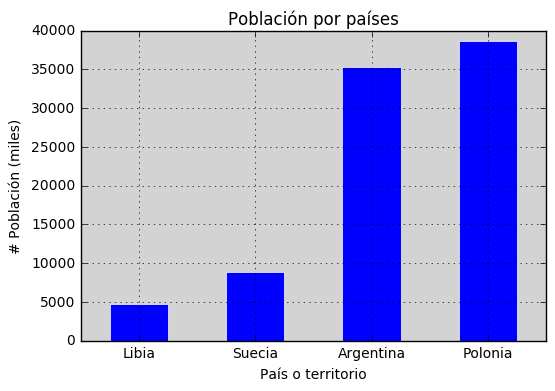

In [20]:
#Sólo con MatPlotLib
datos = tabla.ix[['Argentina','Suecia','Polonia','Libia'],'1995']
#print(datos)
fig,ax = plt.subplots()
x = (1,2,3,4)
datos.sort_values(inplace=True)
ax.bar(x, datos, width=0.5, color='b', tick_label=list(datos.index), 
       align='center', linewidth=0.5, edgecolor='white')
ax.set_title(u'Población por países')
ax.set_xlabel(u'País o territorio')
ax.set_ylabel(u'# Población (miles)')
ax.set_axis_bgcolor('lightgrey')
plt.grid()
plt.show()

In [21]:
# Generamos una lista con los nombres de los países del enunciado
# Utilizamos la opción .loc para seleccionar la subtabla que dibujaremos
# Utilizamos la función .sort_values() para ordenar la subtabla y .plot(kind='bar') para dibujar    
# Podemos utilizar plt.ylabel() para especificar 'población (miles)'



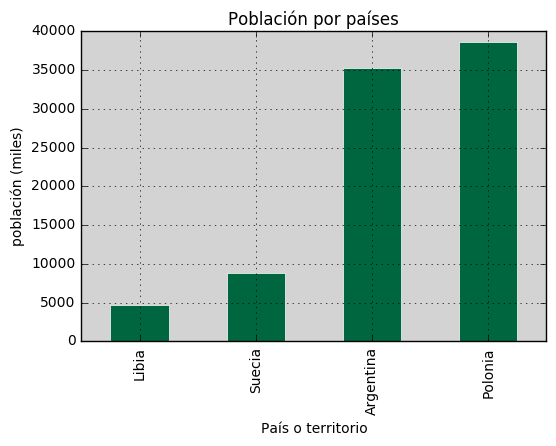

In [22]:
#Con Pandas
lista = list(['Argentina','Suecia','Polonia','Libia'])
subtabla = tabla.loc[lista,'1995']
subtabla.sort_values(inplace=True)
subtabla.plot(kind='bar', width=0.5, color=(0,0.4,0.25), tick_label=lista, 
       align='center', linewidth=0.5, edgecolor='white', grid=True).set_axis_bgcolor('lightgrey')
plt.title(u'Población por países')
plt.xlabel(u'País o territorio')
plt.ylabel(u'población (miles)')

## Dibujar la evolución de la población de 4 países
Dibujar la evolución de la población en todo el periodo para los siguientes países: Alemania, España, Estados Unidos e Italia.

In [23]:
# Mediante la función plot de las librerías matplotlib



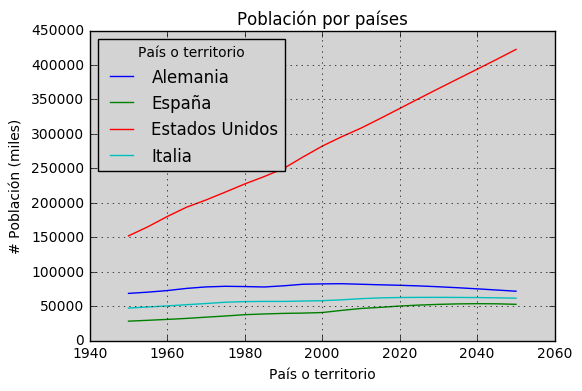

In [24]:
#Sólo con MatPlotLib
datos = tabla.ix[[u'Alemania',u'España',u'Estados Unidos',u'Italia'],'1950':'2050']
alemania = datos.loc[u'Alemania']
espanya = datos.loc[u'España']
eeuu = datos.loc[u'Estados Unidos']
italia = datos.loc[u'Italia']
lista_nombres = list(datos.index)
fig,ax = plt.subplots()
ax.plot(datos.columns, alemania) 
ax.plot(datos.columns, espanya)
ax.plot(datos.columns, eeuu)
ax.plot(datos.columns, italia)
ax.set_title(u'Población por países')
ax.set_xlabel(u'País o territorio')
ax.set_ylabel(u'# Población (miles)')
ax.set_axis_bgcolor('lightgrey')
plt.legend(lista_nombres, loc='upper left', title=u'País o territorio').get_frame().set_facecolor('lightgrey')
plt.grid()
plt.show()

In [25]:
# Generamos una lista con los nombres de los países del enunciado
# Generamos la subtabla correspondiente con la opción .loc
# Utilizamos la función plot(kind='line') para dibujar
# Etiquetamos con plt.xlabel() y plt.ylabel()



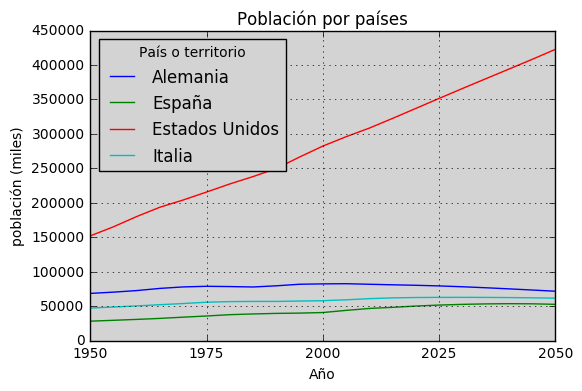

In [26]:
lista = list([u'Alemania',u'España',u'Estados Unidos',u'Italia'])
subtabla = tabla.loc[lista,'1950':'2050'].transpose()
subtabla
subtabla.plot(kind='line', grid=True).set_axis_bgcolor('lightgrey')
plt.title(u'Población por países')
plt.xlabel(u'Año')
plt.ylabel(u'población (miles)')
plt.legend(lista, loc='upper left', title=u'País o territorio').get_frame().set_facecolor('lightgrey')

## Dibujar la evolución de los 5 países más populosos hasta 2010 y 2050  
Dibujar dos gráficas: una con la evolución para todo el período de los países más populosos en 2010, y otra con los países más populosos en 2050. Utilizaremos una función plot_populosos() a la que daremos como argumento el año de interés.

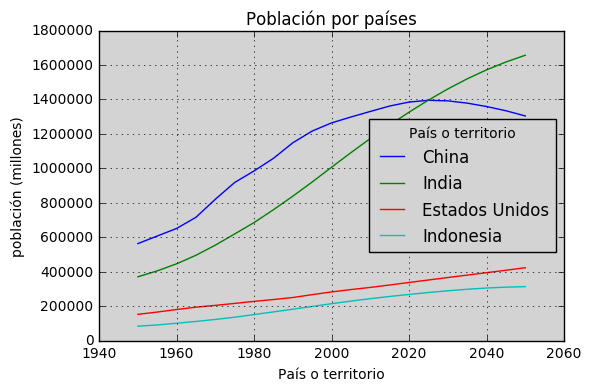

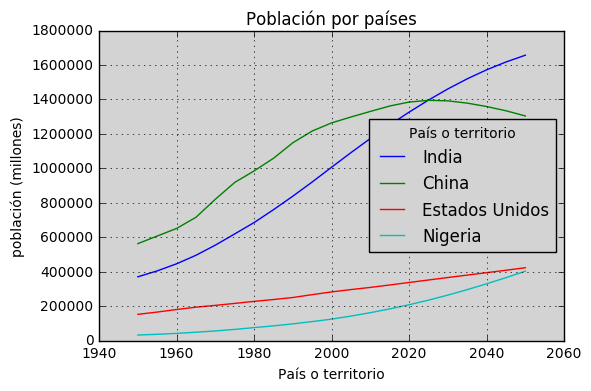

In [27]:
# Mediante la función plot de las librerías matplotlib
def plot_populosos(tabla_param, anyo):
    # Ordenamos la tabla según el año
    subtabla_anyo = pd.DataFrame(tabla_param.loc[:,anyo])
    subtabla_anyo.sort_values(by=(anyo), inplace=True, ascending=False)
    #print(subtabla_anyo.head())
    # Seleccionamos los cinco primeros países mediante .iloc, y extraemos sus nombres
    lista_nombres = list(subtabla_anyo.iloc[0:5,:].transpose())
    #print(lista_nombres)
    # Utilizamos los nombres para invocar la subtabla mediante .loc y dibujamos mediante plot(kind='line')
    subtabla_mas_populosos = pd.DataFrame(tabla_param.loc[lista_nombres,:])
    #print(subtabla_mas_populosos)
    pais1 = subtabla_mas_populosos.iloc[0]
    pais2 = subtabla_mas_populosos.iloc[1]
    pais3 = subtabla_mas_populosos.iloc[2]
    pais4 = subtabla_mas_populosos.iloc[3]
    pais5 = subtabla_mas_populosos.iloc[4]
    fig,ax = plt.subplots()
    ax.plot(subtabla_mas_populosos.columns, pais1) 
    ax.plot(subtabla_mas_populosos.columns, pais2)
    ax.plot(subtabla_mas_populosos.columns, pais3)
    ax.plot(subtabla_mas_populosos.columns, pais4)
    ax.set_title(u'Población por países')
    ax.set_xlabel(u'País o territorio')
    ax.set_ylabel(u'población (millones)')
    ax.set_axis_bgcolor('lightgrey')
    plt.legend(lista_nombres, loc='center right', title=u'País o territorio').get_frame().set_facecolor('lightgrey')
    plt.grid()
    plt.show()


plot_populosos(tabla, '2010')
plot_populosos(tabla, '2050')

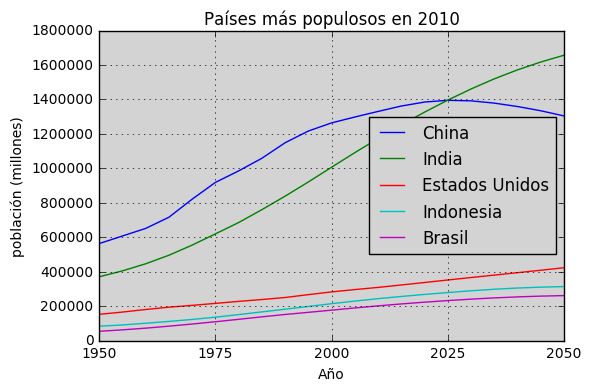

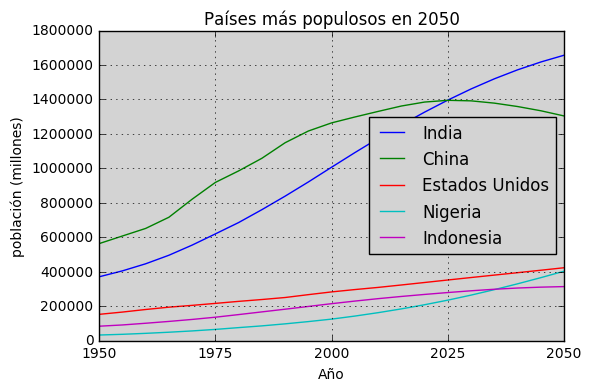

In [28]:
# Definimos la funión plot_populosos()
def plot_populosos(tabla_param, anyo):
    # Ordenamos la tabla según el año
    subtabla_anyo = pd.DataFrame(tabla_param.loc[:,anyo])
    subtabla_anyo.sort_values(by=(anyo), inplace=True, ascending=False)
    #print(subtabla_anyo.head())
    # Seleccionamos los cinco primeros países mediante .iloc, y extraemos sus nombres
    lista_nombres = list(subtabla_anyo.iloc[0:5,:].transpose())
    #print(lista_nombres)
    # Utilizamos los nombres para invocar la subtabla mediante .loc y dibujamos mediante plot(kind='line')
    subtabla_mas_populosos = pd.DataFrame(tabla_param.loc[lista_nombres,:].transpose())
    #print(subtabla_mas_populosos)
    subtabla_mas_populosos.plot(kind='line', grid=True).set_axis_bgcolor('lightgrey')
    plt.title(u'Países más populosos en ' + anyo)
    plt.xlabel(u'Año')
    plt.ylabel(u'población (millones)')
    plt.legend(lista_nombres, loc='center right').get_frame().set_facecolor('lightgrey')

plot_populosos(tabla, '2010')
plot_populosos(tabla, '2050')